## 0. 設定

In [1]:
# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib for japanese support
import japanize_matplotlib

# functions for data frame display
from IPython.display import display

# Adjust display options
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"]=14
random_seed = 123

## 1. データの読み込み

In [2]:
import seaborn as sns

df_titanic = sns.load_dataset("titanic")

columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数',
             '両親子供数', '料金', '乗船港コード', '等室名',
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']
df_titanic.columns = columns_t
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. 欠損値表示

In [3]:
print(df_titanic.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64


In [4]:
print(df_titanic['乗船港'].value_counts())
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64
no     549
yes    342
Name: 生存可否, dtype: int64


## 3. 統計情報の調査

In [5]:
display(df_titanic.describe())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [6]:
display(df_titanic.groupby('性別').mean())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


## 4. 数値項目のグラフ表示

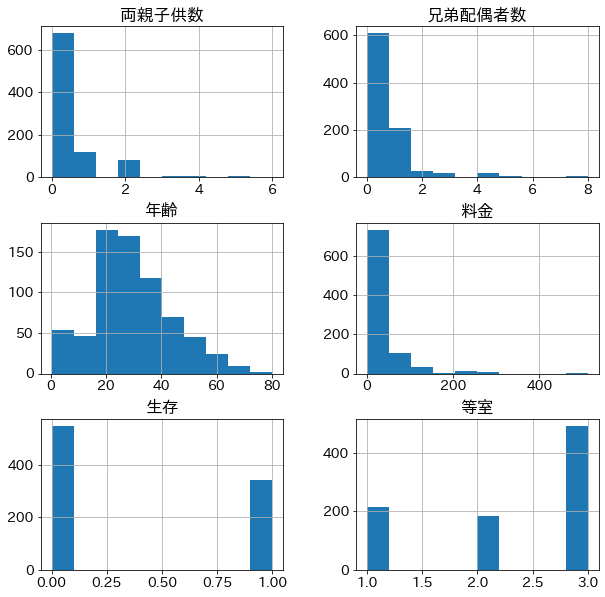

In [9]:
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']
plt.rcParams['figure.figsize'] = (10, 10)
df_titanic[columns_n].hist()
plt.show()

## 5. 非数値項目のグラフ表示

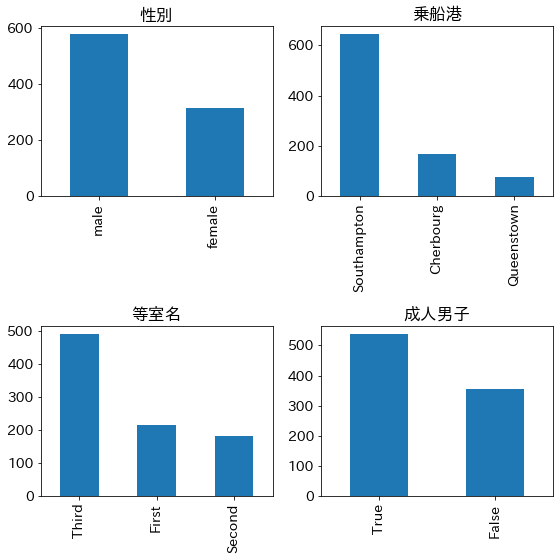

In [12]:
columns_c = ['性別', '乗船港', '等室名', '成人男子']
plt.rcParams['figure.figsize'] = (8, 8)
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)

plt.tight_layout()
plt.show()